In [501]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

AZUL_PETROLEO = "#003366"
DORADO = "#FFA500"
ROSA = "#c706be"
ROJO = "#87050b"
airline = pd.read_csv("./customer_airways_data.csv", encoding="iso-8859-1")
airline.drop_duplicates(inplace=True)
airline = airline.loc[airline.booking_origin != "(not set)",:]

#### Graficamos las variables categoricas

/tmp/ipykernel_11993/996852210.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airline,x="sales_channel",palette=[AZUL_PETROLEO,DORADO])


Text(0, 0.5, 'Cantidad de usuarios')

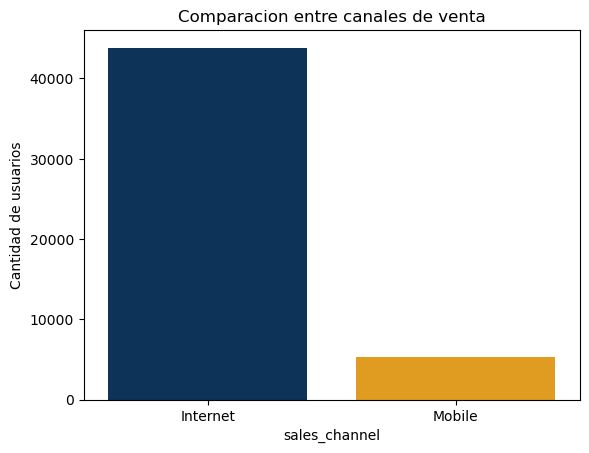

In [502]:
sns.countplot(data=airline,x="sales_channel",palette=[AZUL_PETROLEO,DORADO])
plt.title("Comparacion entre canales de venta")
plt.ylabel("Cantidad de usuarios")

/tmp/ipykernel_11993/2226661855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airline,x="trip_type",palette=[AZUL_PETROLEO,DORADO,ROSA])


Text(0, 0.5, 'Cantidad de usuarios')

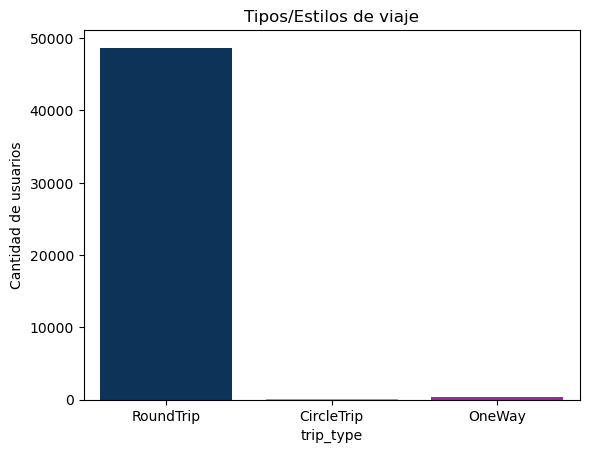

In [503]:
sns.countplot(data=airline,x="trip_type",palette=[AZUL_PETROLEO,DORADO,ROSA])
plt.title("Tipos/Estilos de viaje")
plt.ylabel("Cantidad de usuarios")

#### Un zoom

/tmp/ipykernel_11993/1188868841.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airline,x="trip_type",palette=[AZUL_PETROLEO,DORADO,ROSA])


(0.0, 500.0)

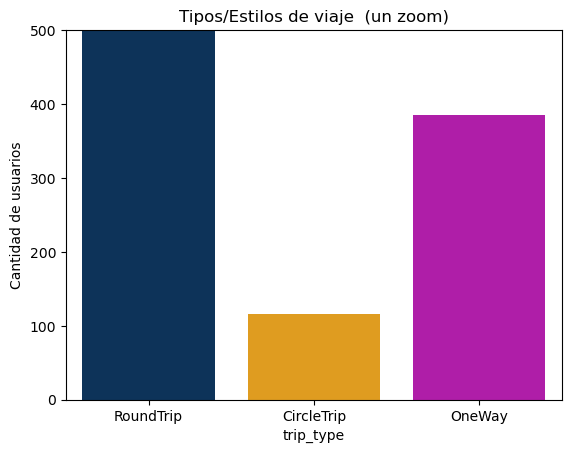

In [504]:
sns.countplot(data=airline,x="trip_type",palette=[AZUL_PETROLEO,DORADO,ROSA])
plt.title("Tipos/Estilos de viaje  (un zoom)")
plt.ylabel("Cantidad de usuarios")
plt.ylim(0,500)

/tmp/ipykernel_11993/1485789139.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airline,x="flight_day",palette= [ "#0b132b","#473a57","#29434e","#006442","#585877","#632424","#987456"])


Text(0, 0.5, 'Cantidad de usuarios')

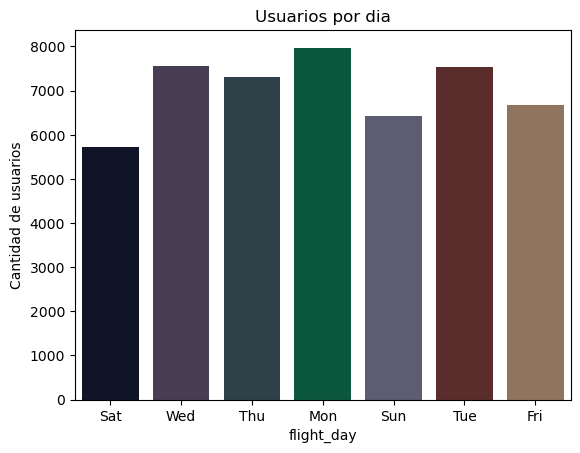

In [505]:
sns.countplot(data=airline,x="flight_day",palette= [ "#0b132b","#473a57","#29434e","#006442","#585877","#632424","#987456"])
plt.title("Usuarios por dia")
plt.ylabel("Cantidad de usuarios")

In [506]:
df_sales_channel = airline.sales_channel.value_counts().to_frame()
df_sales_channel["%"] = df_sales_channel["sales_channel"] * 100 / df_sales_channel["sales_channel"].sum()

df_trip_type = airline.trip_type.value_counts().to_frame()
df_trip_type["%"] = df_trip_type.trip_type * 100 / df_trip_type.trip_type.sum()

df_flight_day = airline.flight_day.value_counts().to_frame()
df_flight_day["%"] = df_flight_day.flight_day * 100 / df_flight_day.flight_day.sum()

print("\n")
print(df_sales_channel)
print("\n-------------------------------\n")
print(df_flight_day)
print("\n-------------------------------\n")
print(df_trip_type)



          sales_channel          %
Internet          43842  89.104323
Mobile             5361  10.895677

-------------------------------

     flight_day          %
Mon        7974  16.206329
Wed        7548  15.340528
Tue        7545  15.334431
Thu        7310  14.856818
Fri        6674  13.564214
Sun        6430  13.068309
Sat        5722  11.629372

-------------------------------

            trip_type          %
RoundTrip       48702  98.981769
OneWay            385   0.782473
CircleTrip        116   0.235758


#### Posibilidad de completar la reserva

In [507]:
airline.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000
mean,1.590005,84.732293,23.061968,9.070951,0.668293,0.295714,0.426783,7.280812,0.149930
std,1.016291,90.437986,33.847217,5.410752,0.470831,0.456368,0.494615,1.496137,0.357006
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Text(0, 0.5, 'Cantidad total de pasajeros')

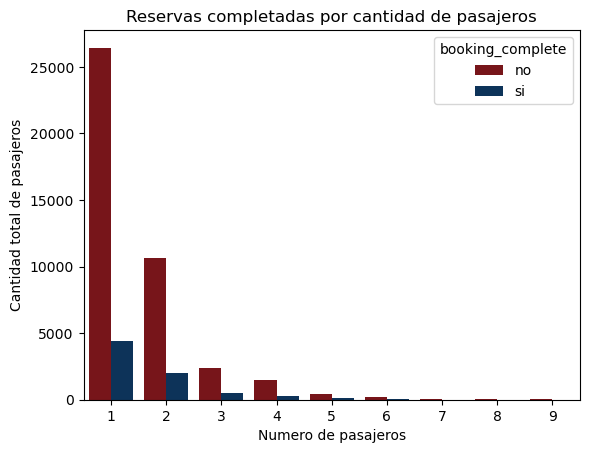

In [508]:
sns.countplot(data=airline,x="num_passengers",palette=[ROJO,AZUL_PETROLEO,],hue=airline["booking_complete"].replace({0:"no",1:"si"}))
plt.title("Reservas completadas por cantidad de pasajeros")
plt.xlabel("Numero de pasajeros")
plt.ylabel("Cantidad total de pasajeros")


In [509]:
airline.groupby("num_passengers")["booking_complete"].value_counts()

num_passengers  booking_complete
1               0                   26438
                1                    4394
2               0                   10624
                1                    2027
3               0                    2390
                1                     485
4               0                    1491
                1                     272
5               0                     438
                1                     106
6               0                     227
                1                      53
7               0                      91
                1                      15
8               0                      76
                1                      12
9               0                      51
                1                      13
Name: booking_complete, dtype: int64

Text(0, 0.5, 'Cantidad de reservas')

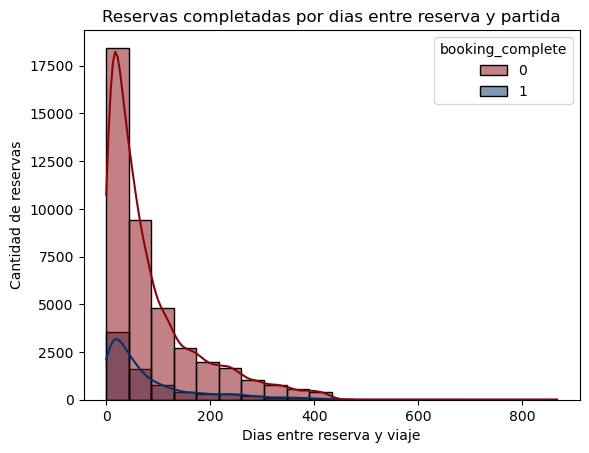

In [510]:
sns.histplot(data=airline,x="purchase_lead",palette=[ROJO,AZUL_PETROLEO],kde=True,bins=20,hue="booking_complete")
plt.title("Reservas completadas por dias entre reserva y partida")
plt.xlabel("Dias entre reserva y viaje")
plt.ylabel("Cantidad de reservas")


In [511]:
airline.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

(0.0, 36000.0)

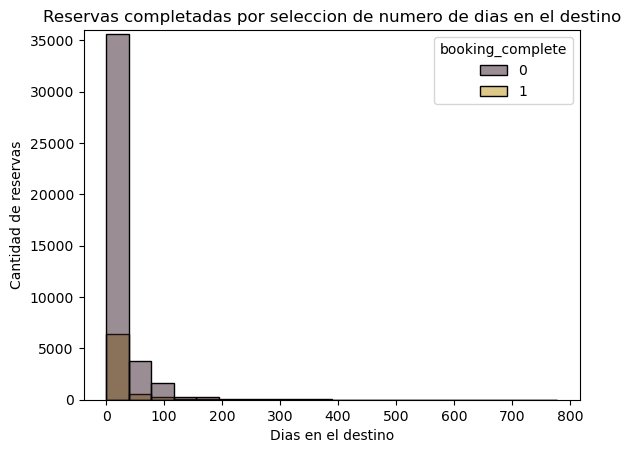

In [512]:
sns.histplot(data=airline,x="length_of_stay",palette=["#371D2A","#BC9216"],bins=20,hue="booking_complete")
plt.title("Reservas completadas por seleccion de numero de dias en el destino")
plt.xlabel("Dias en el destino")
plt.ylabel("Cantidad de reservas")
plt.ylim(0,36000)


Text(9.0448236882716, 0.5, 'Cantidad de reservas')

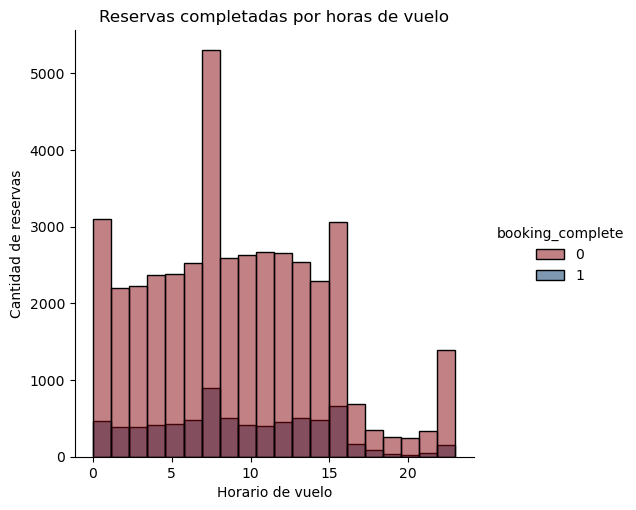

In [513]:
sns.displot(data=airline,x="flight_hour",palette=[ROJO,AZUL_PETROLEO],bins=20,hue="booking_complete")
plt.title("Reservas completadas por horas de vuelo")
plt.xlabel("Horario de vuelo")
plt.ylabel("Cantidad de reservas")


Text(0.5, 1.0, 'Number of passengers complete reservation')

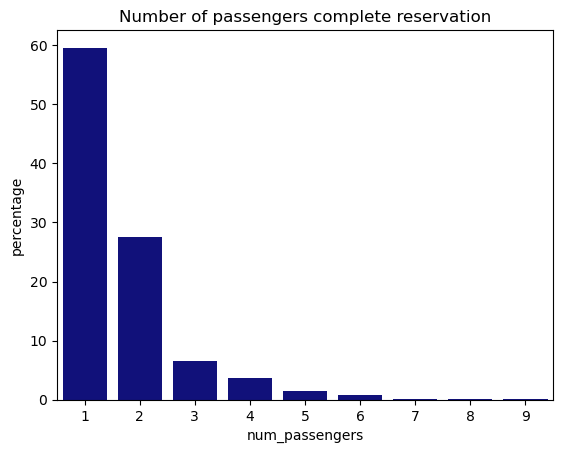

In [514]:
df_booking_complete_per_passengers = airline.loc[airline.booking_complete == 1,"num_passengers"].value_counts()
df_booking_complete_per_passengers = df_booking_complete_per_passengers.to_frame()
df_booking_complete_per_passengers["%"] = df_booking_complete_per_passengers.num_passengers * 100 / df_booking_complete_per_passengers.num_passengers.sum()


df_booking_not_complete_per_passengers = airline.loc[airline.booking_complete == 0,"num_passengers"].value_counts()
df_booking_not_complete_per_passengers = df_booking_not_complete_per_passengers.to_frame()
df_booking_not_complete_per_passengers["%"] = df_booking_not_complete_per_passengers.num_passengers * 100 / df_booking_not_complete_per_passengers.num_passengers.sum()

sns.barplot(data=df_booking_complete_per_passengers,x=[1,2,3,4,5,6,7,9,8],y=df_booking_complete_per_passengers["%"],color="darkblue")
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Number of passengers complete reservation")


Text(0.5, 1.0, 'Number of passengers not complete reservation')

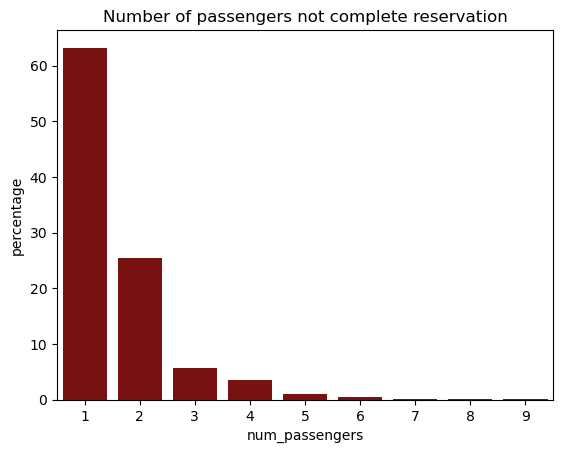

In [515]:
sns.barplot(data=df_booking_not_complete_per_passengers,x=[1,2,3,4,5,6,7,8,9],y=df_booking_not_complete_per_passengers["%"],color="darkred")
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Number of passengers not complete reservation")

Text(0.5, 1.0, 'Percentage comparison of numbers of passengers who complete or do not complete the reservation')

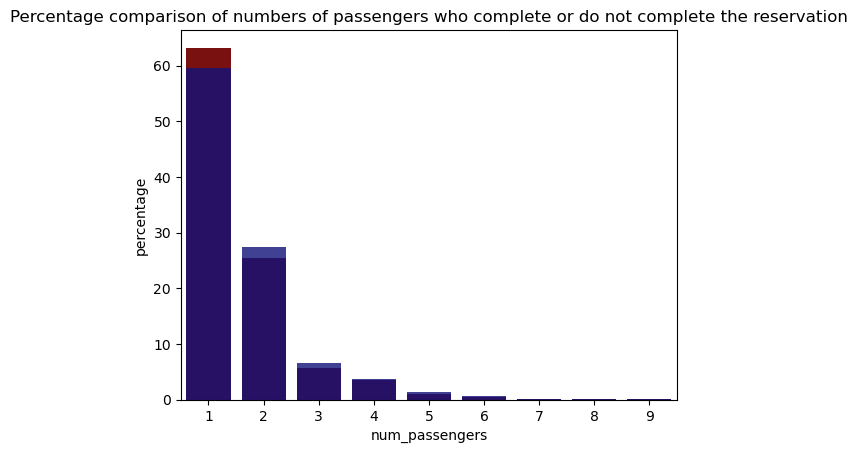

In [516]:
sns.barplot(data=df_booking_not_complete_per_passengers,x=[1,2,3,4,5,6,7,8,9],y=df_booking_not_complete_per_passengers["%"],color="darkred")
sns.barplot(data=df_booking_complete_per_passengers,x=[1,2,3,4,5,6,7,9,8],y=df_booking_complete_per_passengers["%"],color="darkblue",alpha=0.8,width=0.8)
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Percentage comparison of numbers of passengers who complete or do not complete the reservation")



#### Notando que el numero de rechazo de reservas es muy superior, intentaremos analizar el motivo.

##### ¿Hay algun tipo de viaje mas rechazado ?

Text(0, 0.5, 'Cantidad de reservas')

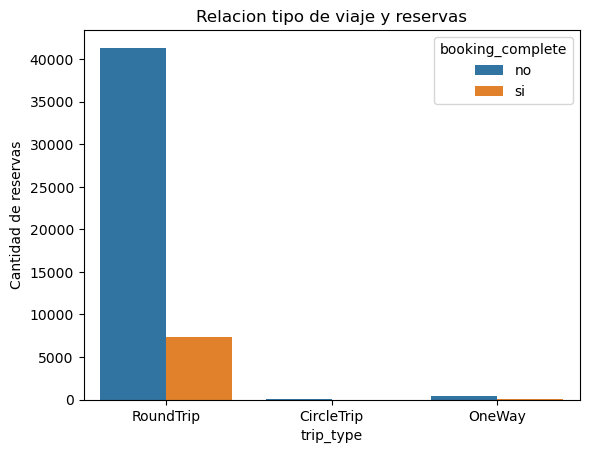

In [517]:
sns.countplot(data=airline,x="trip_type",hue=airline["booking_complete"].replace({0:"no",1:"si"}))
plt.title("Relacion tipo de viaje y reservas")
plt.ylabel("Cantidad de reservas")


##### Observamos un alto número de reservas rechazadas para el tipo RoundTrip 
#### Para comprender mejor esta situación, analizaremos el porcentaje de si y no por cada uno


In [518]:
round_trip = airline.loc[airline["trip_type"] == "RoundTrip",["trip_type","booking_complete"]]
round_trip.value_counts()

round_trip["%"] = 0

round_trip.loc[round_trip.booking_complete == 0,"%"] = round_trip.loc[round_trip.booking_complete == 0,"booking_complete"].count() * 100 / round_trip.booking_complete.count()

round_trip.loc[round_trip.booking_complete == 1,"%"] = round_trip.loc[round_trip.booking_complete == 1,"booking_complete"].count() * 100 / round_trip.booking_complete.count()

round_trip.value_counts()




trip_type  booking_complete  %        
RoundTrip  0                 84.904111    41350
           1                 15.095889     7352
dtype: int64

In [519]:
one_way = airline.loc[airline["trip_type"] == "OneWay",["trip_type","booking_complete"]]


one_way["%"] = 0

one_way.loc[one_way.booking_complete == 0,"%"] = one_way.loc[one_way.booking_complete == 0,"booking_complete"].count() * 100 / one_way.booking_complete.count()

one_way.loc[one_way.booking_complete == 1,"%"] = one_way.loc[one_way.booking_complete == 1,"booking_complete"].count() * 100 / one_way.booking_complete.count()

one_way.value_counts()


trip_type  booking_complete  %        
OneWay     0                 94.805195    365
           1                 5.194805      20
dtype: int64

In [520]:
circle_trip = airline.loc[airline["trip_type"] == "CircleTrip",["trip_type","booking_complete"]]


circle_trip["%"] = 0

circle_trip.loc[circle_trip.booking_complete == 0,"%"] = circle_trip.loc[circle_trip.booking_complete == 0,"booking_complete"].count() * 100 / circle_trip.booking_complete.count()

circle_trip.loc[circle_trip.booking_complete == 1,"%"] = circle_trip.loc[circle_trip.booking_complete == 1,"booking_complete"].count() * 100 / circle_trip.booking_complete.count()

circle_trip.value_counts()





trip_type   booking_complete  %        
CircleTrip  0                 95.689655    111
            1                 4.310345       5
dtype: int64

/tmp/ipykernel_11993/3534139723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type["booking_complete"].replace({0:"no",1:"si"}), y="%",data=type, ax=axes[i],palette=[AZUL_PETROLEO,ROJO])
/tmp/ipykernel_11993/3534139723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type["booking_complete"].replace({0:"no",1:"si"}), y="%",data=type, ax=axes[i],palette=[AZUL_PETROLEO,ROJO])
/tmp/ipykernel_11993/3534139723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type["booking_complete"].replace({0:"no",1:"si"}), y="%",data=type, ax=

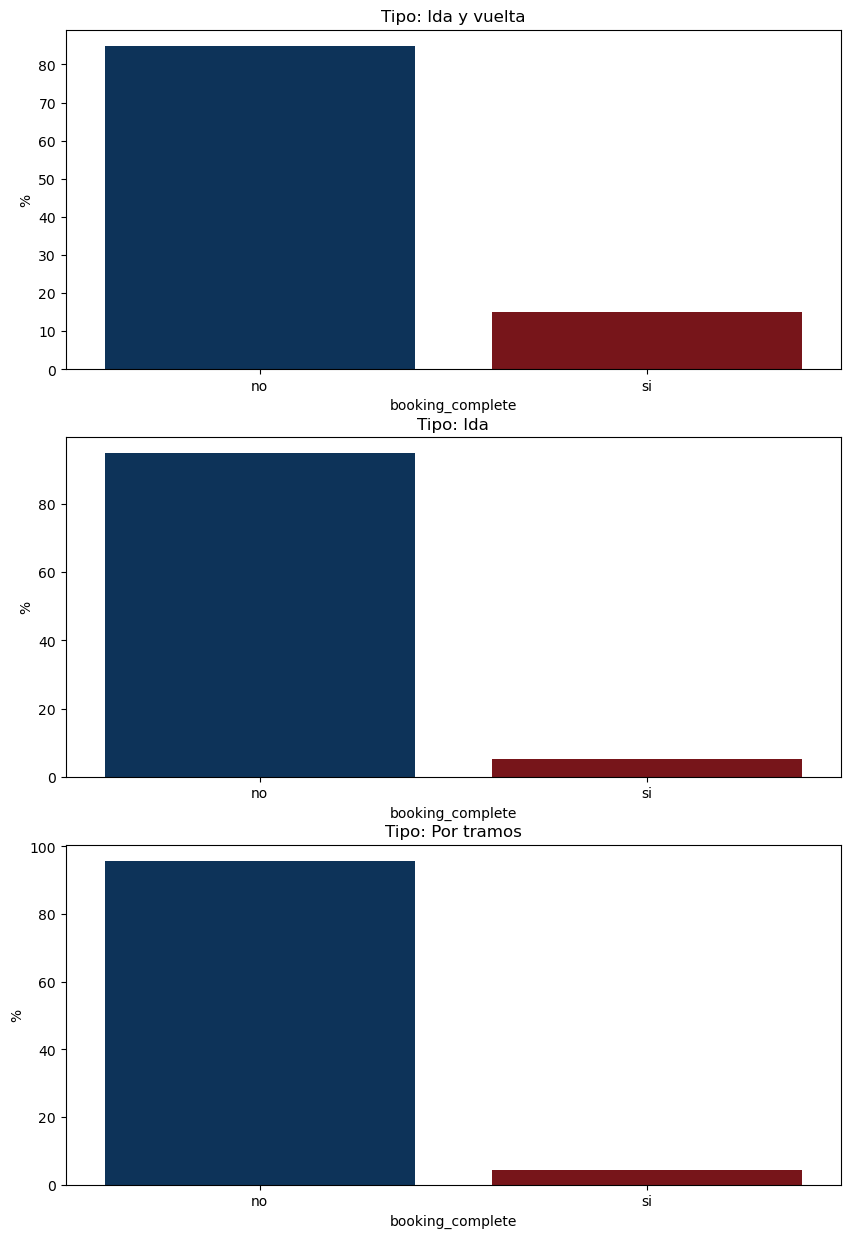

In [521]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

data = [round_trip,one_way,circle_trip]
titles = ["Tipo: Ida y vuelta","Tipo: Ida","Tipo: Por tramos"]

for i, type in enumerate(data):
    sns.barplot(x=type["booking_complete"].replace({0:"no",1:"si"}), y="%",data=type, ax=axes[i],palette=[AZUL_PETROLEO,ROJO])


for i, titles in enumerate(["Tipo: Ida y vuelta","Tipo: Ida","Tipo: Por tramos"]):
    axes[i].set_title(titles)


plt.subplots_adjust(wspace=0.85)


#### Centremos el analisis en RoundTrip

In [544]:
airline_round_trip = airline.loc[airline.trip_type == "RoundTrip",:]
del airline_round_trip["trip_type"]
airline_round_trip

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


#### Relacion entre la espera entre "tiempo de reserva y viaje" y "tiempo de estadia"

In [523]:
airline_round_trip.purchase_lead.describe()

count    48702.000000
mean        84.649973
std         90.453222
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

Text(0.5, 1.0, 'Reservas no completadas')

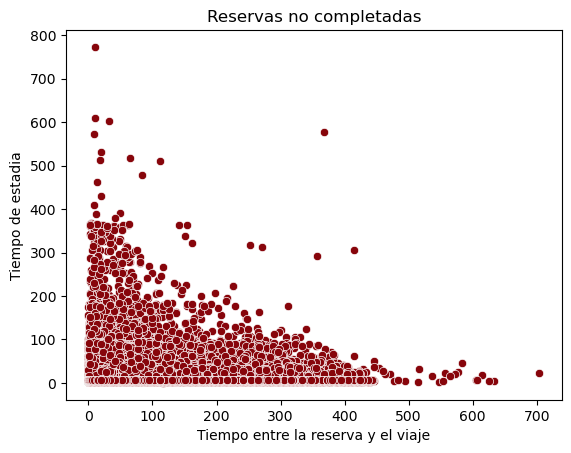

In [559]:

sns.scatterplot(data=airline_round_trip.loc[airline_round_trip.booking_complete == 0],x="purchase_lead",y="length_of_stay",color=[ROJO])
plt.xlabel("Tiempo entre la reserva y el viaje")
plt.ylabel("Tiempo de estadia")
plt.title("Reservas no completadas")

Text(0.5, 1.0, 'Reservas completadas')

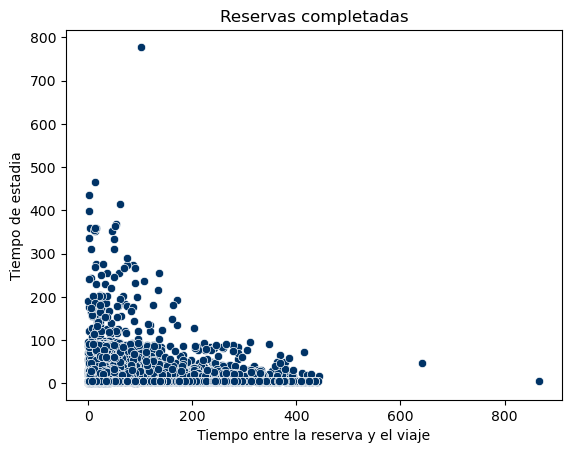

In [560]:

sns.scatterplot(data=airline_round_trip.loc[airline_round_trip.booking_complete == 1],x="purchase_lead",y="length_of_stay",color=[AZUL_PETROLEO])
plt.xlabel("Tiempo entre la reserva y el viaje")
plt.ylabel("Tiempo de estadia")
plt.title("Reservas completadas")

#### El gráfico de estilos de viaje nos reveló que el viaje RoundTrip es la opción predilecta. Pero, ¿a qué se debe esta preferencia? Descubriendo las claves del roundtrip: 
#### Estancias cortas: La mayoría de las reservas se realizan para estancias medianamente cortas, inferiores a 100 días. El tiempo de reserva y el tiempo de viaje es un factor determinante. La mayoría de las reservas se realizan con anticipación, también inferior a 100 días. 

Text(0.5, 1.0, 'Reservas completadas')

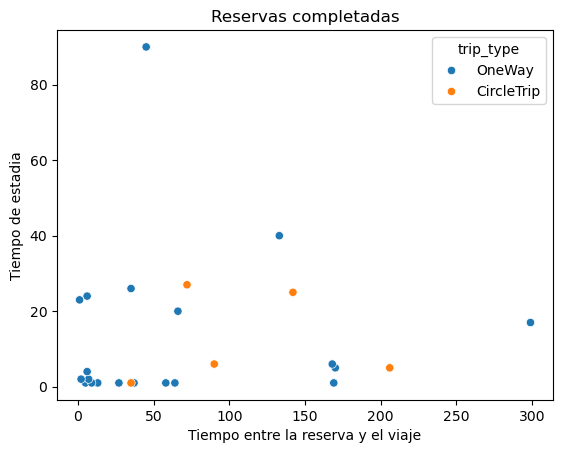

In [578]:
sns.scatterplot(data=airline,x="purchase_lead",y="length_of_stay",hue=airline.loc[(airline["trip_type"] != "RoundTrip") & (airline["booking_complete"] == 1),"trip_type"])
plt.xlabel("Tiempo entre la reserva y el viaje")
plt.ylabel("Tiempo de estadia")
plt.title("Reservas completadas")

#### Hay relacion con el tipo de viaje para estas preferencias ?

In [579]:
airline_wants = airline[['wants_extra_baggage', 'wants_preferred_seat','wants_in_flight_meals','trip_type','flight_hour']]

Text(0.5, 1.0, 'Prefeencias vs Tipo de Viajes')

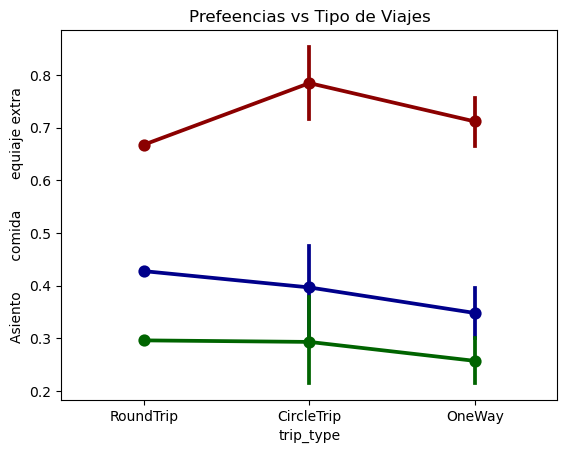

In [584]:
sns.pointplot(data=airline,x="trip_type",y='wants_extra_baggage',linestyle="solid",color="darkred")
sns.pointplot(data=airline,x="trip_type",y='wants_in_flight_meals',linestyle="solid",color="darkblue")
sns.pointplot(data=airline,x="trip_type",y="wants_preferred_seat",linestyle="solid",color="darkgreen")
plt.ylabel('Asiento       comida       equiaje extra')
plt.title("Prefeencias vs Tipo de Viajes")

#### Seria interesante analizar si  disminucion del equipaje extra se debe a que el numero de solicitante de reserva es mayor:


<AxesSubplot:xlabel='num_passengers', ylabel='wants_extra_baggage'>

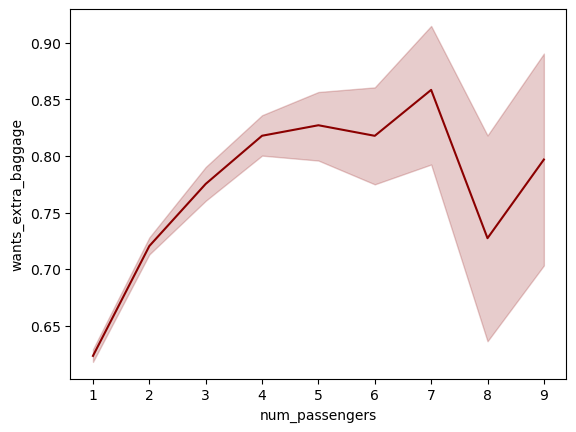

In [585]:
sns.lineplot(data=airline[['wants_extra_baggage', 'num_passengers']],x="num_passengers",y='wants_extra_baggage',linestyle="solid",color="darkred")

#### Pero que ocurre para las reservas completas ?

Text(0.5, 0, 'NUmero de pasajeros')

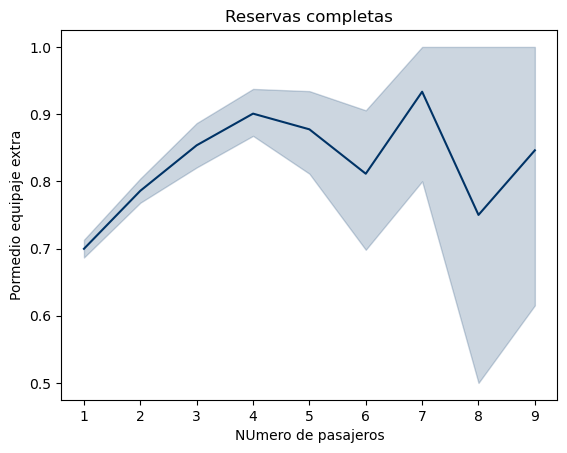

In [588]:
sns.lineplot(data=airline.loc[airline.booking_complete == 1],x="num_passengers",y='wants_extra_baggage',linestyle="solid",color=AZUL_PETROLEO)
plt.title("Reservas completas")
plt.ylabel("Pormedio equipaje extra")
plt.xlabel("NUmero de pasajeros")

### Conclusiones:

1. El canal de venta preferido por los clientes es via Internet
3. La taza de reservas concretadas es mayor cuanto menor es el grupo de personas, siendo el pasaje unico el de mejores resultados
4. Hay una preferencia por tomar vuelos entre las 6 y 14 hs
5. RoundTrip es el tipo de viaje mas solicitado
6. RoundTrip es el tipo de viaje con mejor taza de concrecion de reserva para grupos de personas entre 1 y 3
7. La taza de concrecion de reserva para 7 pasajeros en OneWay es la mas alta en su tipo
8. OneWay tiene resultados muy desfavorables en general
9. CircleTrip es la peor categoria de tipo de vuelo, con una taza de concrecion muy baja, la cantidad de reservas no completas esta muuy por arriba de las completas
10. RoundTrip obtiuene resultados positivos para esperas menores a 200 dias
11. OnewWay obtiene resultados positivos para esperas menosres a 175 dias
12. CircleTrip muestra pocos resultados positivos, solo viendoloes en reservas con 1 o 2 pasajeros y menos de 150 dias de esera


------------------

### Análisis de reservas de vuelos - Conclusiones

+ Preferencias de clientes:

  1. Internet es el canal de venta predilecto.
  2. Las reservas para un solo pasajero presentan la tasa de concreción más alta, seguidas por grupos pequeños (2 a 4 personas).
  3. La franja horaria preferida se extiende entre las 6 y las 14 horas.
  4. RoundTrip es viaje más solicitado.
  5. Eficiencia en grupos pequeños. RoundTrip también brilla en la tasa de concreción para grupos de 1 a 3 personas.
  6. OneWay tiene resultados altibajos. OneWay presenta resultados positivos para esperas inferiores a 175 días, pero su tasa general de concreción es menos favorable. Aunque para 7 pasajeros se destaca con la tasa de concreción más alta dentro de su tipo.
  7. CircleTrip se ubica como la categoría con menor tasa de concreción, pero se ven resultados positivos se concentran en reservas con 1 o 2 pasajeros y esperas inferiores a 150 días.
  8. RoundTrip y OneWay crecen con esperas acotadas. Ambos tipos de viaje muestran mejores resultados para esperas menores a 200 y 175 días respectivamente.

#### Este análisis nos invita a reflexionar sobre las preferencias de los clientes impulsando a:

+ Fortalecer el canal de venta online.
+ Optimizar las estrategias para grupos grandes.
+ Enfocarnos en la mejora de CircleTrip.
